Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


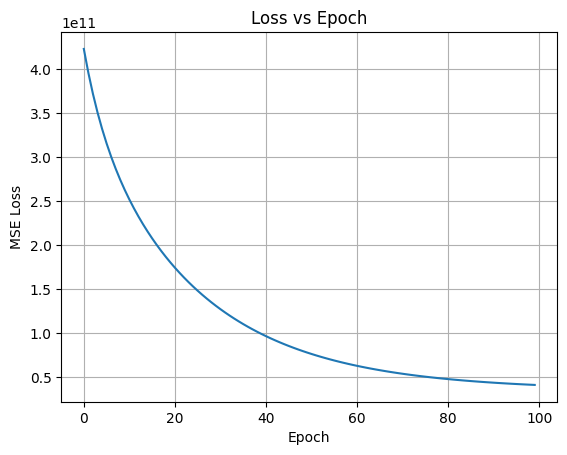

     Actual      Predicted
0    235000  173958.859638
1    552000  573629.197883
2    615000  454643.087380
3    555000  508128.679156
4    649950  517218.995763
5    257700  111992.719243
6    980000  798452.682571
7    535000  350470.414883
8   1030000  818390.084670
9    549950  506760.393588
10   580000  643154.367527
11   300000  238174.402556
12   389900  252343.910779
13   255000  184176.963183
14   776000  708184.190469
15   319000  209661.808603
16   970500  798748.788132
17   356500  342698.229632
18   295000  112693.520299
19   165000   84025.135943


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("house_data.csv")
print(df.columns) 


X = df.drop('Price', axis=1)  
y = df['Price']               

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


np.random.seed(42)
n_features = X_train.shape[1]
weights = np.random.randn(n_features)
bias = 0.0


learning_rate = 0.01
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    predictions = np.dot(X_train, weights) + bias
    errors = predictions - y_train
    loss = np.mean(errors ** 2)
    losses.append(loss)
    
    dw = (2 / X_train.shape[0]) * np.dot(X_train.T, errors)
    db = (2 / X_train.shape[0]) * np.sum(errors)
    
    weights -= learning_rate * dw
    bias -= learning_rate * db

# Plot Loss
plt.plot(range(n_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss vs Epoch')
plt.grid()
plt.show()


test_predictions = np.dot(X_test, weights) + bias


comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': test_predictions
})
print(comparison.head(20))
